# Data Analysis - covid19

* Data download
* Data wrangling
* Data plot

### Remarks:
* convert DateRep to pd date format
* set 'Date' as index

In [1]:
import numpy as np
import pandas as pd
import os
import datetime
import sys
#from urllib.error import URLerror
import urllib.request
from urllib.error import HTTPError
from colorama import Fore

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


## Requesting & preprocessing Data

1. Data Download
2. Data import
3. Data wrangling


In [2]:
# ----------------------- Download file -----------------------
# format: 
# https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-22.xlsx


def check_directory(cwd):
    return os.access(cwd, os.F_OK or os.X_OK or os.R_OK | os.W_OK) 

def check_existence(file_name):
    return os.path.isfile(file_name)


def get_link_and_filename():
    prefix = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-'
    file_ending = '.xlsx'
    file_date = datetime.datetime.now().strftime("%Y-%m-%d")
    
    link_str = prefix + file_date + file_ending
    file_name = "COVID-19-geographic-disbtribution-worldwide-" + file_date + file_ending
    print(link_str)
    print(file_name)
    return link_str, file_name

def file_yesterday():
    file_date_yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
    
    file_name_yesterday = "COVID-19-geographic-disbtribution-worldwide-"+ file_date_yesterday.strftime("%Y-%m-%d") + ".xlsx"
    return file_name_yesterday
    

def file_download():
    
    cwd = os.getcwd()
    link, file_name = get_link_and_filename()
        
    if check_directory(cwd):
        print(f"Work directory ( {cwd} ) is OK")
        if check_existence(file_name):
            print(f"File ( {file_name} ) already exists")
        else:
            try:
                urllib.request.urlretrieve(link, file_name)
            except urllib.error.URLError as err:
                print(f"{Fore.RED}Error occured (maybe data not only yet) " 
                      + Fore.BLUE + f"ERROR CODE: {err.code}")
                
                
                    

        
get_link_and_filename()
file_download()

https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-25.xlsx
COVID-19-geographic-disbtribution-worldwide-2020-03-25.xlsx
https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-25.xlsx
COVID-19-geographic-disbtribution-worldwide-2020-03-25.xlsx
Work directory ( /home/olli/Jupyter_Notebook/Covid_DataAnalyis ) is OK


In [3]:
# ----------------------- Read file / create pandas dataframe -----------------------
    
cwd = os.getcwd()
link, file_name = get_link_and_filename()

# instance on xlsx file
if check_existence(file_name):
    try:
        xlsx = pd.ExcelFile(file_name)
    except FileNotFoundError as err:
        print(f"{Fore.RED}Error occured: {Fore.BLACK}{err}")
else:
    xlsx = pd.ExcelFile(file_yesterday())
    

# read instance to pandas dataframe
df = pd.read_excel(xlsx, parse_dates=True)

# convert date to correct pd datetime format
df['DateRep'] = pd.to_datetime(df.DateRep)

# set date as index
df.set_index('DateRep', inplace=True)

# change order for timeseries
df.sort_values(by='DateRep')

https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-25.xlsx
COVID-19-geographic-disbtribution-worldwide-2020-03-25.xlsx


,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Pop_Data.2018
DateRep,,,,,,,,
2019-12-31,31,12,2019,0,0,Indonesia,ID,267663435.0
2019-12-31,31,12,2019,0,0,United_Arab_Emirates,AE,9630959.0
2019-12-31,31,12,2019,0,0,Austria,AT,8847037.0
2019-12-31,31,12,2019,0,0,Switzerland,CH,8516543.0
2019-12-31,31,12,2019,0,0,Nepal,NP,28087871.0
...,...,...,...,...,...,...,...,...
2020-03-25,25,3,2020,2,0,New_Caledonia,NC,284060.0
2020-03-25,25,3,2020,2,0,Haiti,HT,11123176.0
2020-03-25,25,3,2020,4,0,Cambodia,KH,16249798.0


In [4]:
# ----------------------- Data wrangling -----------------------
# net necessary yet !?!

# check data
index = df.index
columns = df.columns
values = df.values

display(type)
display(columns)
display(index)
display(values)
# display(type(df['DateRep']))
# df['DateRep'].dtype

type

Index(['Day', 'Month', 'Year', 'Cases', 'Deaths', 'Countries and territories',
       'GeoId', 'Pop_Data.2018'],
      dtype='object')

DatetimeIndex(['2020-03-25', '2020-03-24', '2020-03-23', '2020-03-22',
               '2020-03-21', '2020-03-20', '2020-03-19', '2020-03-18',
               '2020-03-17', '2020-03-16',
               ...
               '2020-03-23', '2020-03-22', '2020-03-21', '2020-03-20',
               '2020-03-19', '2020-03-25', '2020-03-24', '2020-03-23',
               '2020-03-22', '2020-03-21'],
              dtype='datetime64[ns]', name='DateRep', length=6738, freq=None)

array([[25, 3, 2020, ..., 'Afghanistan', 'AF', 37172386.0],
       [24, 3, 2020, ..., 'Afghanistan', 'AF', 37172386.0],
       [23, 3, 2020, ..., 'Afghanistan', 'AF', 37172386.0],
       ...,
       [23, 3, 2020, ..., 'Zimbabwe', 'ZW', 14439018.0],
       [22, 3, 2020, ..., 'Zimbabwe', 'ZW', 14439018.0],
       [21, 3, 2020, ..., 'Zimbabwe', 'ZW', 14439018.0]], dtype=object)

## Plotting Data

* TODO:
    * implement date selection and autifill
    * functions for functionality 
    * Show various statistics

### Plotting Timeseries

### Plotting cumulative sum 

Cases in Austria:  5282
Deaths in Austria:  30


Text(0.5, 1.0, 'Italy - cumulative sum ')

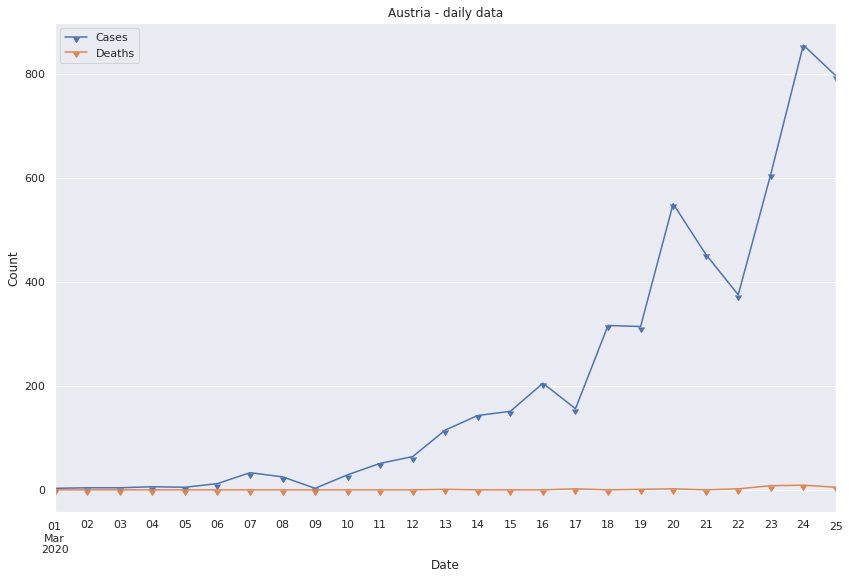

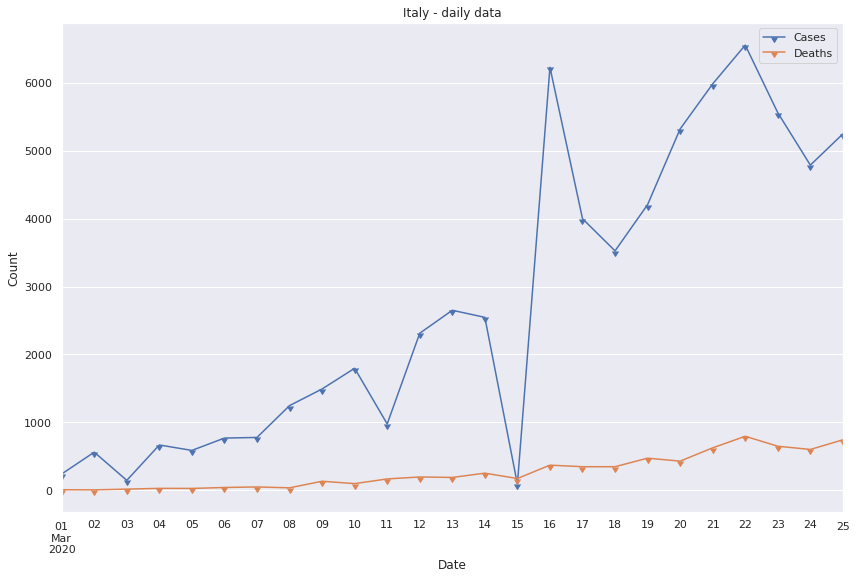

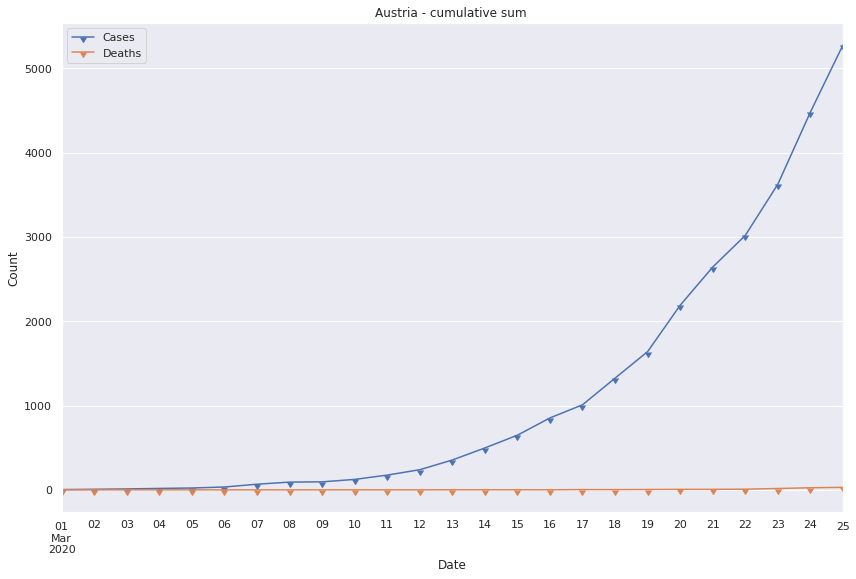

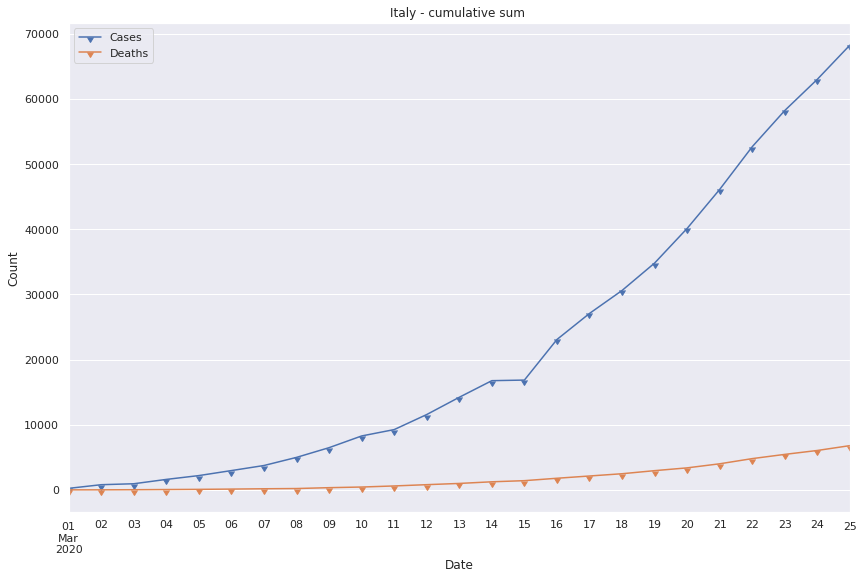

In [24]:
# ----------------------- Read file -----------------------

# TODO:
#  - choose date and fill in everywhere automatically
#  - Automatically show statistics


df_aut = df.loc[df['Countries and territories']=='Austria']
df_it = df.loc[df['Countries and territories']=='Italy']
df_aut = df_aut.sort_index(ascending=True)
df_it = df_it.sort_index(ascending=True)
df_aut_march = df_aut.loc['2020-03-01':'2020-03-25']
df_it_march = df_it.loc['2020-03-01':'2020-03-25']


# show some data
aut_cumsum_cases = df_aut.cumsum().loc['2020-03-25'].loc['Cases']
aut_cumsum_deaths = df_aut.cumsum().loc['2020-03-25'].loc['Deaths']
print("Cases in Austria: ", aut_cumsum_cases)
print("Deaths in Austria: ", aut_cumsum_deaths)


# Plots
ax = df_aut_march.plot(y=['Cases','Deaths'], grid=True, marker=11, figsize=(14,9))
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.set_title("Austria - daily data")

ax = df_it_march.plot(y=['Cases','Deaths'], grid=True, marker=11, figsize=(14,9))
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.set_title("Italy - daily data")

ax = df_aut_march.cumsum().plot(y=['Cases','Deaths'], grid=True, marker=11, figsize=(14,9))
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.set_title("Austria - cumulative sum ")

ax = df_it_march.cumsum().plot(y=['Cases','Deaths'], grid=True, marker=11, figsize=(14,9))
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.set_title("Italy - cumulative sum ")

'Cases in Austria: '

Text(0.5, 1.0, 'China - cumulative sum ')

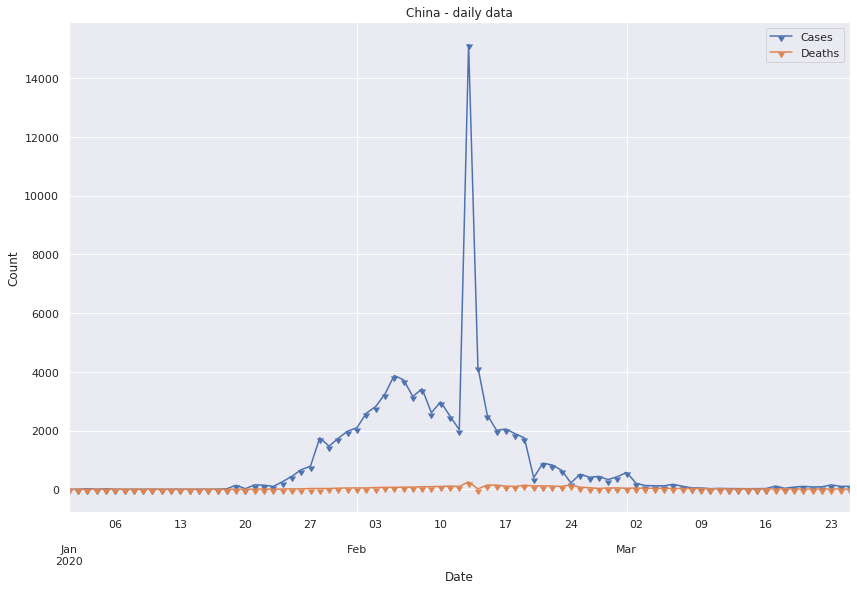

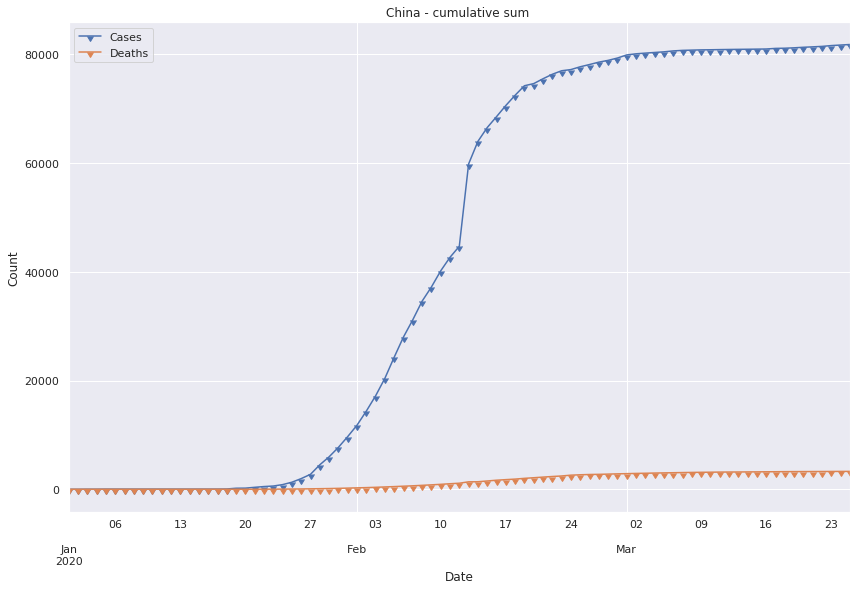

In [12]:
#  CHINA

df_chn = df.loc[df['Countries and territories']=='China']
df_chn = df_chn.sort_index(ascending=True)
df_chn_all = df_chn.loc['2020-01-01' :'2020-03-25']

display("Cases in Austria: ")

ax = df_chn_all.plot(y=['Cases','Deaths'], grid=True, marker=11, figsize=(14,9))
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.set_title("China - daily data")


ax = df_chn_all.cumsum().plot(y=['Cases','Deaths'], grid=True, marker=11, figsize=(14,9))
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.set_title("China - cumulative sum ")


In [6]:
print(file_yesterday())

COVID-19-geographic-disbtribution-worldwide-2020-03-24.xlsx
